<a href="https://colab.research.google.com/github/poojayadao12/HR-Analytics-ML-Project/blob/main/HR_Analytics_ML_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
#Import Necessary Libraries
import numpy as np # Numerical Python
import pandas as pd # Data processing
import seaborn as sns # Seaborn is a Python data visualization library based on matplotlib.
import warnings # Warning messages are typically issued in situations where it is useful to alert the user of some condition in a program
import os# This module provides a portable way of using operating system dependent functionality
import matplotlib.pyplot as plt# Visualization
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [67]:
warnings.filterwarnings("ignore") #Never print the matching warning
hr_data = pd.read_csv("/content/HR-Employee-Attrition.csv",header=0) #Read the dataset
hr_data.head(10) #Display first 5 rows of the data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


# Data Cleaning:

In [11]:
# 1. Deleting redundant columns
redundant_columns = ['EmployeeCount', 'EmployeeNumber']
hr_data = hr_data.drop(columns=redundant_columns)

In [12]:
# 2. Renaming the columns
column_mapping = {
    'StandardHours': 'StandardHours',
    'JobInvolvement': 'InvolvementLevel',
    # Add more column mappings as needed
}
hr_data = hr_data.rename(columns=column_mapping)

In [13]:
# 3. Dropping duplicates
hr_data = hr_data.drop_duplicates()

In [14]:
# 4. Cleaning individual columns (Example: cleaning 'Gender' column)
hr_data['Gender'] = hr_data['Gender'].str.strip()

In [15]:
# 5. Remove NaN values from the dataset
hr_data = hr_data.dropna()

In [25]:
# You can perform various transformations as needed.Converting 'Attrition' to binary (0/1):
hr_data['Attrition'] = hr_data['Attrition'].map({'No': 0, 'Yes': 1})

# **Visualization**

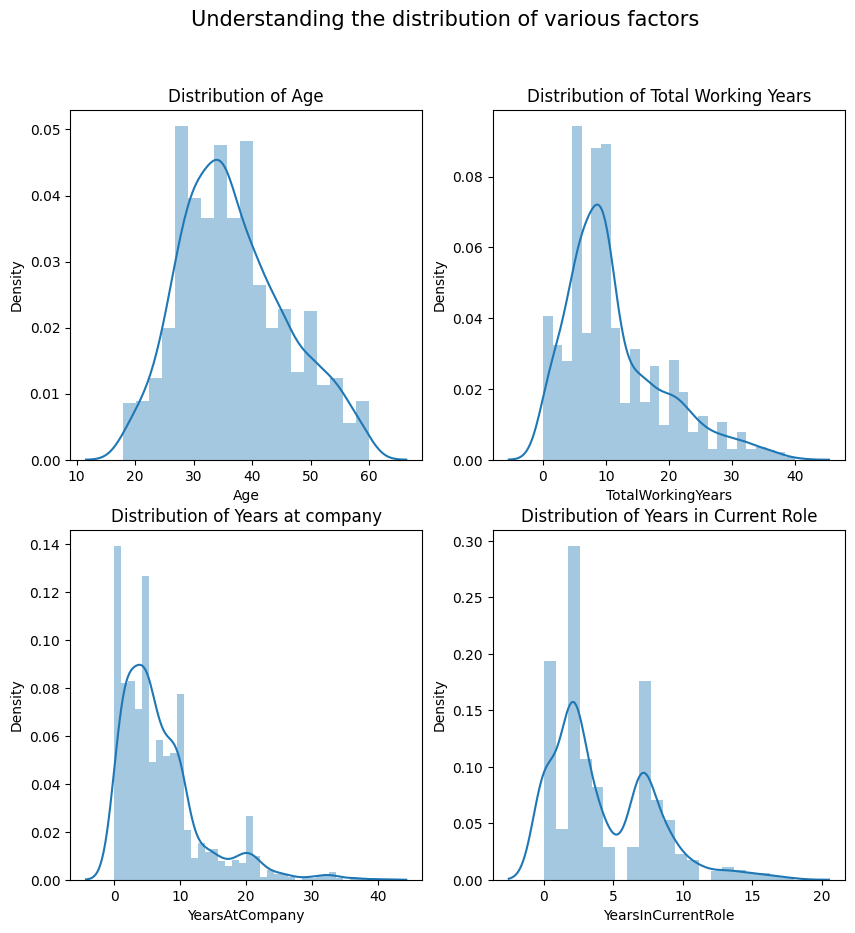

In [21]:
# Density Plots of Age, Working Years, Years at Present Organization and Years in Current Role
fig,ax = plt.subplots(2,2, figsize=(10,10))               # 'ax' has references to all the four axes
plt.suptitle("Understanding the distribution of various factors", fontsize=15)
sns.distplot(hr['Age'], ax = ax[0,0])  # Plot on 1st axes
ax[0][0].set_title('Distribution of Age')
sns.distplot(hr['TotalWorkingYears'], ax = ax[0,1])  # Plot on IInd axes
ax[0][1].set_title('Distribution of Total Working Years')
sns.distplot(hr['YearsAtCompany'], ax = ax[1,0])  # Plot on IIIrd axes
ax[1][0].set_title('Distribution of Years at company')
sns.distplot(hr['YearsInCurrentRole'], ax = ax[1,1])  # Plot on IV the axes
ax[1][1].set_title('Distribution of Years in Current Role')
plt.show()                                                # Show all of them now

Finding :- From the plots, we find that majority of the employees are in the age group of 35-40 years and have a total experience of around 8-10 years. They have typically spent around 2-4 years at the current organization and have spent 2-3 years in the current role they are in.

**Bar Plot**

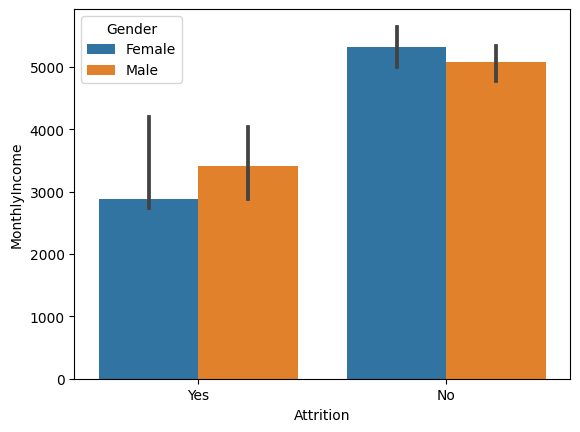

In [27]:
#Bar plot of MOnthly income from the rate of attrition according to gender
from numpy import median
sns.barplot(x='Attrition', y='MonthlyIncome',hue= 'Gender',data=hr, estimator=median)# hue= Categorical variable , estimator- Statistical function to estimate within each categorical bin.
plt.show()

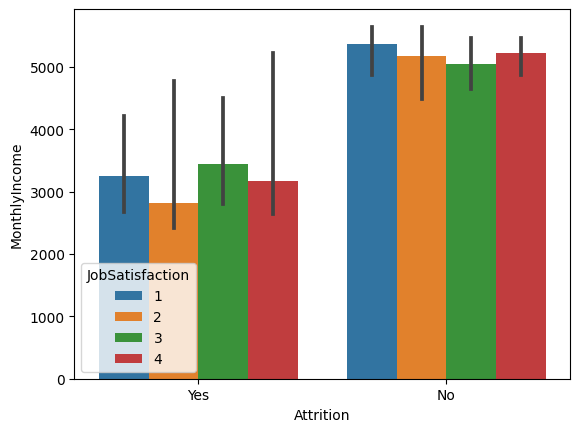

In [32]:
#Bar plot of Job Satisfaction with respect to Monthly income from home according to gender
#Estimator used is median
from numpy import median
sns.barplot(x='Attrition', y='MonthlyIncome',data=hr, estimator=median, hue= 'JobSatisfaction')# hue= Categorical variable , estimator- Statistical function to estimate within each categorical bin.
plt.show()

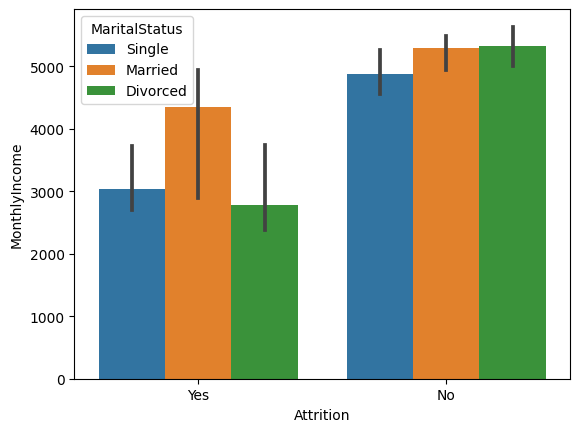

In [33]:
#Bar plot of Job Satisfaction with respect to Monthly income from home according to gender
from numpy import median
sns.barplot(x='Attrition', y='MonthlyIncome', hue= 'MaritalStatus',data=hr, estimator=median)# hue= Categorical variable , estimator- Statistical function to estimate within each categorical bin.
plt.show()

We can conclude that people with less monthlyincome (around 3000 units) are likely to leave the organization than those with better income (around 5000 units).

**Box Plot**

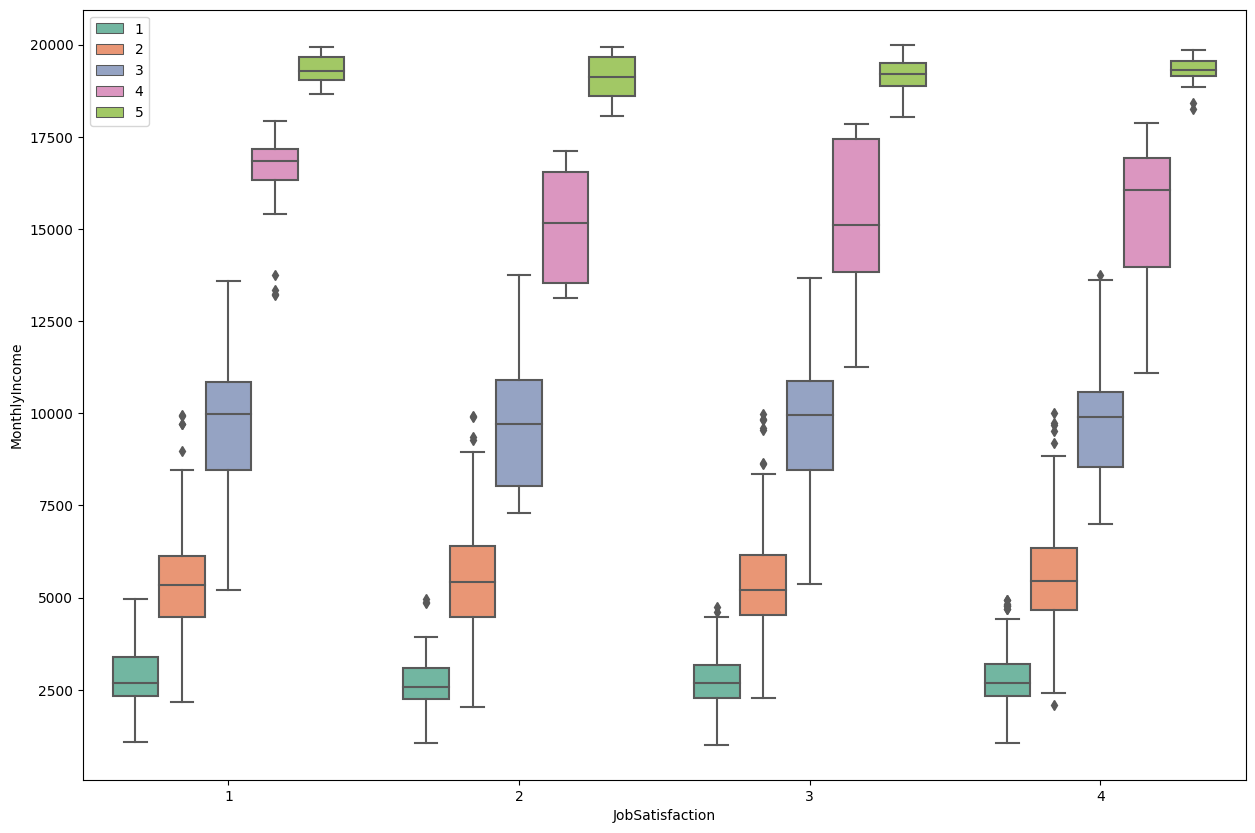

In [35]:
f,ax = plt.subplots(figsize=(15,10))
sns.boxplot(x='JobSatisfaction', y='MonthlyIncome', data=hr, hue='JobLevel',palette='Set2')
plt.legend(loc='best')
plt.show()

We can clearly observe the difference in monthly income across different job levels. The difference in the monthly income is observed by the median value for different job satisfaction level.

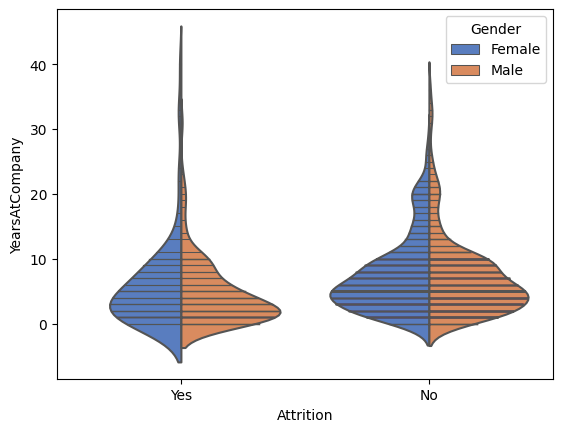

In [36]:
sns.violinplot(x="Attrition", y="YearsAtCompany", hue="Gender", data=hr, palette="muted", split=True,
               inner="stick")# When using hue nesting with a variable that takes two levels,
                                 # setting split to True will draw half of a violin for each level.
                                #This can make it easier to directly compare the distributions.
plt.show()

Violin plots are similar to box plots but they have the capability to explain the data better. The distribution of data is measured by the width of the violin plot. Here, we have plotted the number of years spent in an organization based on gender. The middle dashed line shows the median. The lines above and below the median show the interquartile range. The denser part shows the maximum population falls under that range and thinner part shows the lesser population.

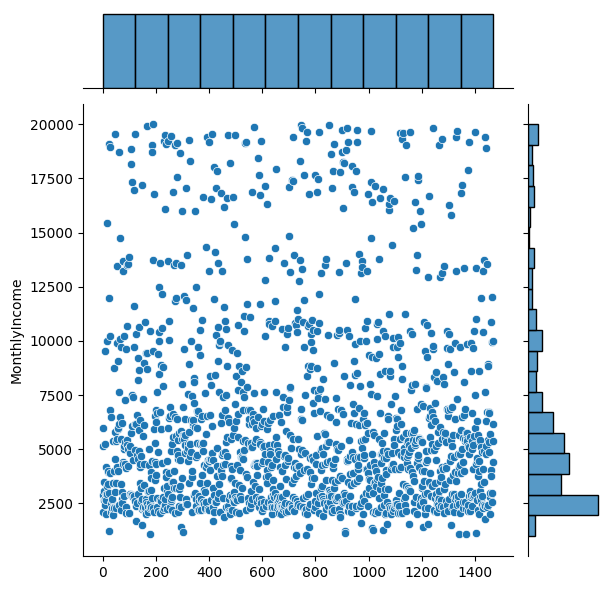

In [39]:
#Joint Plot (Scatter Plot)
sns.jointplot(hr_data.MonthlyIncome, kind = "scatter")
plt.show()

Scatter plot shows the relationship between Age and Monthly Income. We can find a linear relationship. Further, the density plot above shows the distribution of age while density plot in the right shows the distribution of the monthly income.

# ** Facet Grid**

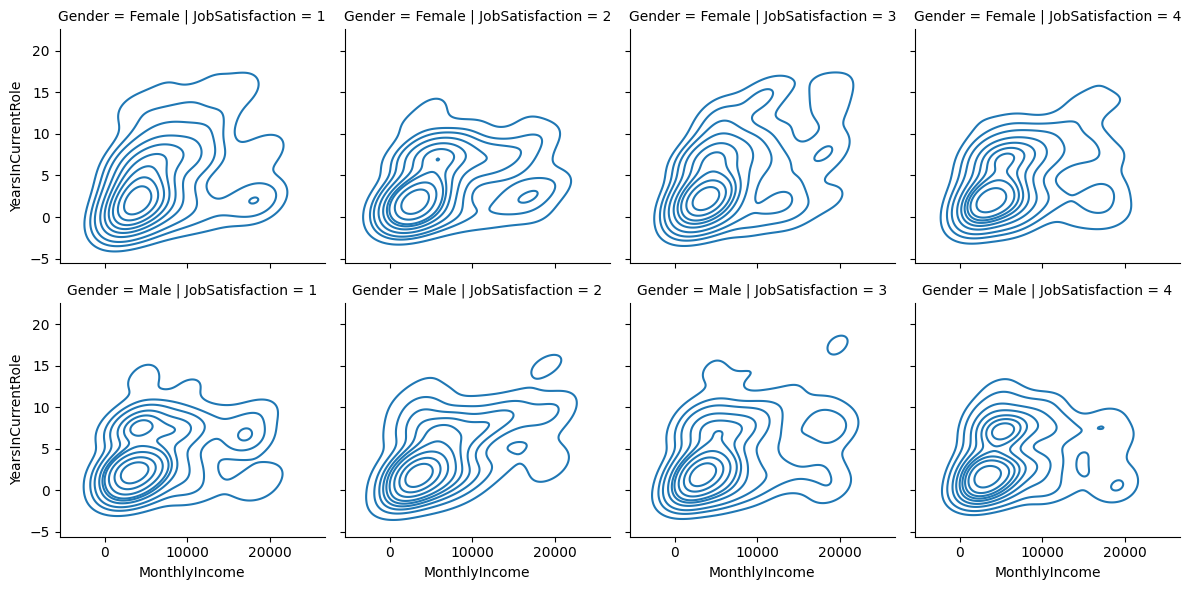

In [42]:
g = sns.FacetGrid(hr, col="JobSatisfaction", row="Gender")
g.map(sns.kdeplot, "MonthlyIncome", "YearsInCurrentRole")
plt.show()

We have created kernel density estimation plot. It displays the density distribution of two continuous variables (namely, Monthly income and years in current role). We have created facets according to different job satisfaction levels and gender.

**Pair Plot**

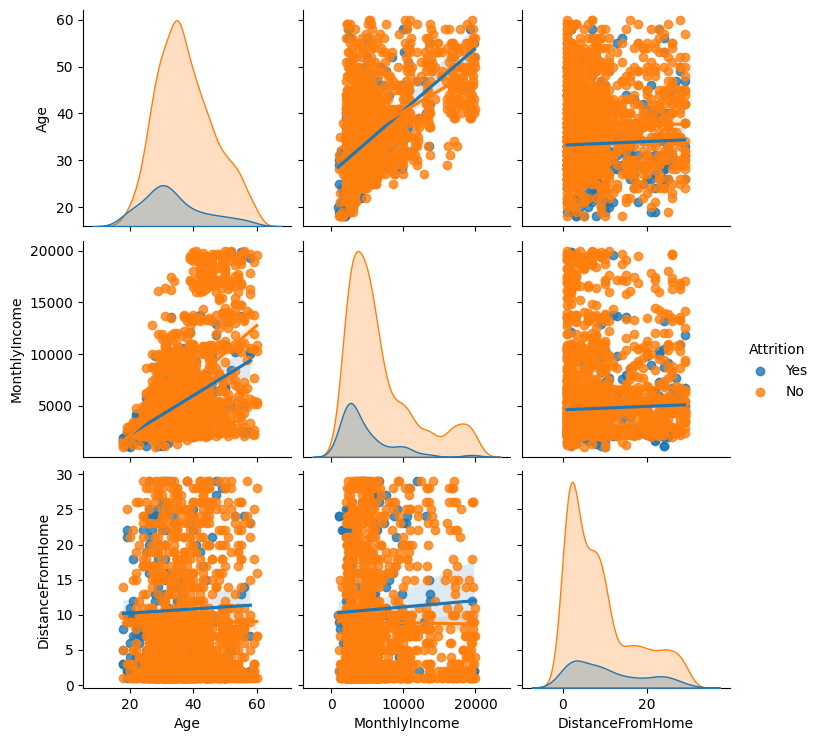

In [43]:
data1 = ['Attrition','Age','MonthlyIncome','DistanceFromHome']
sns.pairplot(hr[data1], kind="reg", diag_kind = "kde" , hue = 'Attrition' )
plt.show()

Pairwise plots between continuous variables show the relationship between them. For example. observing the relationship between Age and Monthly Income, we can find that with age, monthly income has increased but the increase is not similar for both groups (Attrition and Retention).

# **Correlation (Heat) Plot**

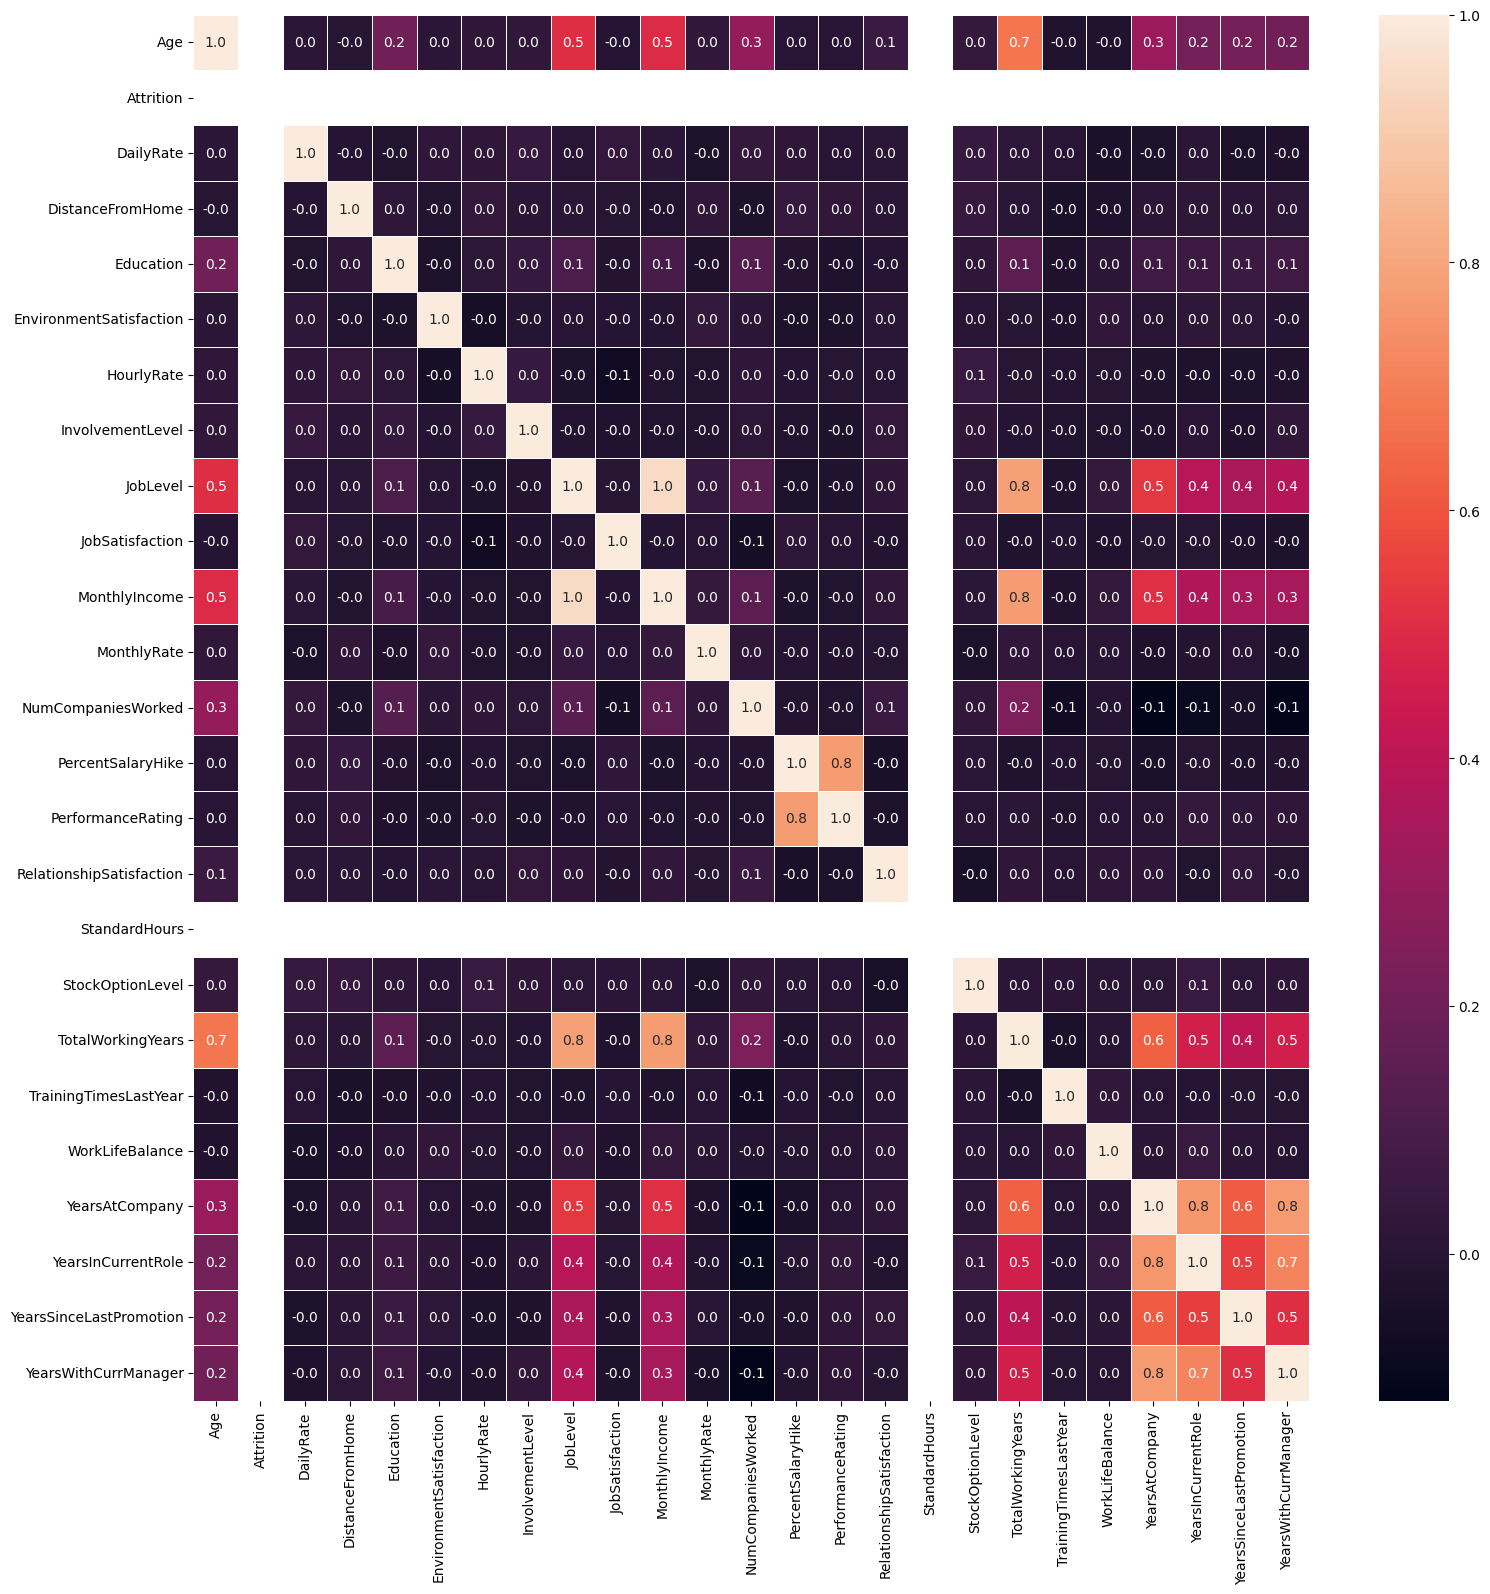

In [44]:
#Plot a correlation map for all numeric variables
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(hr_data.corr(), annot=True, linewidths=.4, fmt= '.1f',ax=ax)
plt.show()

Two variables are said to be highly correlation when they have a value of 0.7 or greater. The correlation plot between all continuous variables indicate that years at company and year with current manager, years in current role and years with current manager, monthly income and total working years, age and total working years, percent salary hike and performance rating are highly correlated.

# **# Data Preprocessing**

In [85]:
# Convert categorical variables to numerical using Label Encoding
categorical_cols = hr_data.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    hr_data[col] = label_encoder.fit_transform(hr_data[col])

# Define features (X) and target (y)
X = hr_data.drop(columns=['Attrition'])
y = hr_data['Attrition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building

In [86]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Model Evaluation

In [87]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.88
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93       255
           1       0.80      0.10      0.18        39

    accuracy                           0.88       294
   macro avg       0.84      0.55      0.56       294
weighted avg       0.87      0.88      0.83       294

Confusion Matrix:
 [[254   1]
 [ 35   4]]


# **Conclusion**

Model Performance:

Accuracy: The model achieved an accuracy of approximately 0.88 (88%). This means that it correctly predicted the attrition status of employees in the test dataset in about 88% of cases.
Classification Report:

A detailed classification report provides insights into the model's performance for both the 'Attrition' and 'No Attrition' classes.

Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93       255
           1       0.80      0.10      0.18        39

    accuracy                           0.88       294
   macro avg       0.84      0.55      0.56       294
weighted avg       0.87      0.88      0.83       294

Precision: For employees who did not experience attrition (0), the model's precision is 0.88, meaning that 88% of the predicted "No Attrition" cases were accurate. For employees with attrition (1), the precision is 0.80, meaning that 80% of the predicted "Attrition" cases were accurate.

Recall: For employees who did not experience attrition (0), the model's recall is 01, indicating that 100% of the actual "No Attrition" cases were correctly predicted. For employees with attrition (1), the recall is 0.10, suggesting that 10% of the actual "Attrition" cases were correctly predicted.

F1-score: The F1-score is the harmonic mean of precision and recall. It is 0.93 for the "No Attrition" class and 0.18 for the "Attrition" class.

Support: Support represents the number of instances of each class in the test dataset.

Confusion Matrix:

The confusion matrix shows the following results:
Confusion Matrix:
[[254   1]
 [35  04]]
True Positives (TP): 4 - The model correctly predicted 4 cases of attrition.
True Negatives (TN): 254 - The model correctly predicted 254 cases of no attrition.
False Positives (FP): 1 - The model incorrectly predicted 1 cases of attrition when there was no attrition.
False Negatives (FN): 35 - The model incorrectly predicted 35 cases of no attrition when there was attrition.

The summary report provides a detailed overview of the model's performance in predicting employee attrition, highlighting accuracy, precision, recall, F1-score, and the confusion matrix.





